A: 學業成績資料初級分析。請自選至少6題完成，大於6題算加分。
1. 如何求得Gillian Lin的數學分數?
2. 如何求得英文最高的學生名字?
3. 如何列出英文不及格的人數及人名?
4. 如何找出哪一科不及的人數最多?
5. 如何從各科無加權的原始總分，列出名次的人名排序?
6. 如何算出姓Lin 的同學數學平均分?
7. 如何找出哪個姓氏的同學數學最好?
8. 如何找出以ABCDE 級距來分，化學的成績中哪個級距的人數最多。 ( 100>=A>90, 90>B>=80,  80>C>=70, 70>D>=60, 60>E )

In [1]:
!wget 'https://drive.google.com/uc?export=download&id=1-0W0PIng8b0WRYEkDRl2u4eD0QNJa6Tb' -O data.csv

--2023-01-04 03:05:47--  https://drive.google.com/uc?export=download&id=1-0W0PIng8b0WRYEkDRl2u4eD0QNJa6Tb
Resolving drive.google.com (drive.google.com)... 142.250.1.138, 142.250.1.102, 142.250.1.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.1.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u36v35ov2if4a4mj9olq3p5v2cfcdljt/1672801500000/17823811839281681652/*/1-0W0PIng8b0WRYEkDRl2u4eD0QNJa6Tb?e=download&uuid=4c9f96d4-80a5-43d7-9811-e6053b53ed87 [following]
--2023-01-04 03:05:48--  https://doc-0g-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u36v35ov2if4a4mj9olq3p5v2cfcdljt/1672801500000/17823811839281681652/*/1-0W0PIng8b0WRYEkDRl2u4eD0QNJa6Tb?e=download&uuid=4c9f96d4-80a5-43d7-9811-e6053b53ed87
Resolving doc-0g-a8-docs.googleusercontent.com (doc-0g-a8-docs.googleusercontent.com)... 173.194.194.132, 2607:f8b

In [2]:
#1. 如何求得Gillian Lin的數學分數?
import csv
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  for i in range(1,28):
    if "Gillian Lin" in scores_list[i][1]:
      print("Gillian Lin的數學分數：{}".format(scores_list[i][4]))

Gillian Lin的數學分數：35


In [3]:
#2. 如何求得英文最高的學生名字?
import csv
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  TOP=1
  for i in range(1,28):
    if scores_list[i][3] > scores_list[TOP][3]:
      TOP=i
print("英文最高的學生：{} {}分".format(scores_list[TOP][1],scores_list[TOP][3]))

英文最高的學生：Karen Wu 98分


In [4]:
#3. 如何列出英文不及格的人數及人名?
import csv
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  print("列出英文不及格的人數及人名：")
  count=0
  for i in range(1,28):
    if float(scores_list[i][3]) < 60:
      count=count+1
      print(scores_list[i][1])
print("英文不及格的人數：{}".format(count))

列出英文不及格的人數及人名：
Susan Lu
Claire Lin
Jacqueline
Amanda
Mark Wu
Steven Yang
Robert Chen
Stephen Yang
William Lin
英文不及格的人數：9


In [5]:
#4. 如何找出哪一科不及的人數最多?
import csv
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  num=[0]*8
  TOP=0
  for j in range(2,10):
    count=0
    for i in range(1,28):
     if float(scores_list[i][j]) < 60:
      count=count+1
    num[j-2]=count
    if float(num[j-2]) > float(num[TOP]):
      TOP=j
print("不及格人數最多的科目：{},人數:{}".format(scores_list[0][TOP+2],num[TOP]))

不及格人數最多的科目：Chinese,人數:14


In [6]:
#5. 如何從各科無加權的原始總分，列出名次的人名排序?
import csv
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  score=[0]*27
  for i in range(1,28):
   for j in range(2,10):
    score[i-1]+=float(scores_list[i][j])
  #print(score)
  print("無加權的原始總分名次的人名排序：")
  score1=score[:]
  score1.sort()
  score1.reverse()
  #print(score1)
  for i in range(0,27):
    for j in range(0,27):
      if (float(score1[i]) == float(score[j])):
       print(scores_list[j+1][1])

無加權的原始總分名次的人名排序：
Julie Chen
Karen Wu
Nicola Chu
Paul Chen
Andrew Wang
Fiona Wu
Tracy Wu
Sharon Chiu
Kevin Chen
Scott Wu
Angela Chen
Michelle Lin
Michael Chu
James Lin
Leo Su
John Chu
Gillian Lin
David Lin
Mark Wu
David Lin
Mark Wu
Steven Yang
Robert Chen
William Lin
Claire Lin
Stephen Yang
Amanda
Susan Lu
Jacqueline


In [7]:
#6. 如何算出姓Lin 的同學數學平均分?
import csv
# 開啟 CSV 檔案
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  count=0
  score=0
  for i in range(1,28):
    #print(scores_list[i][1])
    if "Lin" in scores_list[i][1]:
      score+=float(scores_list[i][4])
      count=count+1
print("姓Lin 的同學數學平均分：{:.2f}".format(score/count))

姓Lin 的同學數學平均分：60.33


In [8]:
#7. 如何找出哪個姓氏的同學數學最好?
import csv
# 開啟 CSV 檔案
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  name=["Chu","Wu","Lu","Lin","Chiu","Chen","Wang","Yang","Su"]
  name_score=[0]*9
  for n in range(9):
    count=0
    score=0
    for i in range(1,28):
      #print(scores_list[i][1])
      if name[n] in scores_list[i][1]:
        score+=float(scores_list[i][4])
        count=count+1
    name_score[n]=float(score/count)
  #print(name_score)
  TOP=0
  for i in range(9):
    if float(name_score[i])>float(name_score[TOP]):
      TOP=i
print("{}姓氏的同學數學平均最好，平均:{:.0f}".format(name[TOP],name_score[TOP]))

Wang姓氏的同學數學平均最好，平均:83


In [9]:
#8. 如何找出以ABCDE 級距來分，化學的成績中哪個級距的人數最多。 ( 100>=A>90 *註:此處似乎錯誤?, 90>B>=80,  80>C>=70, 70>D>=60, 60>E )
import csv
# 開啟 CSV 檔案
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  classification=[0]*5
  for i in range(1,28):
    if(float(scores_list[i][5])>=90):
      classification[0]+=1
    elif(float(scores_list[i][5])<90 and float(scores_list[i][5])>=80):
      classification[1]+=1
    elif(float(scores_list[i][5])<80 and float(scores_list[i][5])>=70):
      classification[2]+=1
    elif(float(scores_list[i][5])<70 and float(scores_list[i][5])>=60):
      classification[3]+=1
    elif(float(scores_list[i][5])<60):
      classification[4]+=1
  TOP=0
  for i in range(5):
    if int(classification[i])>int(classification[TOP]):
      TOP=i
  #print(classification)
  #print(TOP)
  print("化學的成績中{}級距的人數最多,有{}人".format(chr(TOP+65),classification[TOP]))

化學的成績中C級距的人數最多,有10人


---

B: 學業成績資料進階級分析。請自選至少4題完成，大於4題算加分。
	資源來源同上:
1. 如何推算出 Final 1 方式的成績單的加權公式及加分?
2. 依據Final 2 若已知前8號同學中，只有5號加2分, 7&8號加1分，請問如何推算出成績單的Final 2 加權公式?
3. 根據上題結果，如何再推算出每位同學的加分情況?
4. 如何判斷哪些科目的學習所需之大腦能力相近?
5. 如何判斷哪些科目的學習所需之大腦能力相異?
6. 如何判斷哪個同學最有專才?
7. 如何判斷哪些同學具有通才?
8. 如何判斷哪兩個同學的大腦能力最相近?
9. 如何判斷哪個同學最有可能作弊?


In [10]:
#1. 如何推算出 Final 1 方式的成績單的加權公式及加分?
#假設所有人都有Bonus
import numpy as np
#寫出係數矩陣 A
A = np.array([
    [77,89,89,95,100,100,97.5,90,1],
    [75,98,94,87.5,90,97.5,100,96,1],
    [74,90,73,85,97.5,95,92.5,92,1],
    [40,23,42,40,32.5,40.5,55,26,1],
    [55,29,69,62.5,75,66.5,92.5,86,1],
    [74,81,80,82.5,90,93,95,98,1],
    [69,87,70,67.5,85,95,90,84,1],
    [54,66,35,65,80,98,92.5,92,1],
    [88,87,100,97.5,95,100,100,100,1]
])
# 寫出常數矩陣 B
B = np.array([91.525,91.075,86.2875,41.075,64.6,84.6875,80.5875,70.625,94.3125]).reshape(9, 1)
# 找出係數矩陣的反矩陣 A_inv
A_inv = np.linalg.inv(A)
# 將 A_inv 與 B 相乘，即可得到解答
ans = A_inv.dot(B)
#print(ans)
print("Final 1: Chinese{}; English{}; Math{}; Physical and chemical{}; Geophaphy{}; History{}; Physics{}; Civics{}; Bonus{}".format(ans[0],ans[1],ans[2],ans[3],ans[4],ans[5],ans[6],[int(ans[7])],ans[8]))

Final 1: Chinese[0.15]; English[0.15]; Math[0.125]; Physical and chemical[0.125]; Geophaphy[0.125]; History[0.125]; Physics[0.15]; Civics[0]; Bonus[4.]


In [11]:
#2. 依據Final 2 若已知前8號同學中，只有5號加2分, 7&8號加1分，請問如何推算出成績單的Final 2 加權公式?
import numpy as np
#寫出係數矩陣 A
A = np.array([
    [77,89,89,95,100,100,97.5,90],
    [75,98,94,87.5,90,97.5,100,96],
    [74,90,73,85,97.5,95,92.5,92],
    [40,23,42,40,32.5,40.5,55,26],
    [55,29,69,62.5,75,66.5,92.5,86],
    [74,81,80,82.5,90,93,95,98],
    [69,87,70,67.5,85,95,90,84],
    [54,66,35,65,80,98,92.5,92],
])
# 寫出常數矩陣 B
B = np.array([91.075,90.8,85.725,38.7375,65.275-2,84.075,80.925-1,70.7625-1]).reshape(8, 1)
# 找出係數矩陣的反矩陣 A_inv
A_inv = np.linalg.inv(A)
# 將 A_inv 與 B 相乘，即可得到解答
ans = A_inv.dot(B)
#print(ans)
print("Final 2: Chinese{}; English{}; Math{}; Physical and chemical{}; Geophaphy{}; History{}; Physics{}; Civics{}".format(ans[0],ans[1],ans[2],ans[3],ans[4],ans[5],ans[6],ans[7]))

Final 2: Chinese[0.15]; English[0.1625]; Math[0.125]; Physical and chemical[0.125]; Geophaphy[0.125]; History[0.125]; Physics[0.175]; Civics[0.]


In [12]:
#3. 根據上題結果，如何再推算出每位同學的加分情況?
import csv
# 開啟 CSV 檔案
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  Bonus=0
  print("每位同學的加分")
  for i in range(1,28):
    Bonus=float(scores_list[i][12])-(0.15*float(scores_list[i][2])+0.1625*float(scores_list[i][3])+0.125*float(scores_list[i][4])+0.125*float(scores_list[i][5])+0.125*float(scores_list[i][6])+0.125*float(scores_list[i][7])+0.175*float(scores_list[i][8])+0*float(scores_list[i][9]))
    print("{:15}的 Bonus: {}".format(scores_list[i][1],int(Bonus)))

每位同學的加分
Nicola Chu     的 Bonus: 0
Karen Wu       的 Bonus: 0
Fiona Wu       的 Bonus: 0
Susan Lu       的 Bonus: 0
Claire Lin     的 Bonus: 2
Sharon Chiu    的 Bonus: 0
Angela Chen    的 Bonus: 1
Gillian Lin    的 Bonus: 1
Julie Chen     的 Bonus: 3
Michelle Lin   的 Bonus: 0
Jacqueline     的 Bonus: 0
Amanda         的 Bonus: 1
Tracy Wu       的 Bonus: 3
David Lin      的 Bonus: 3
John Chu       的 Bonus: 1
Paul Chen      的 Bonus: 1
Mark Wu        的 Bonus: 2
James Lin      的 Bonus: 0
Andrew Wang    的 Bonus: 2
Scott Wu       的 Bonus: 3
Steven Yang    的 Bonus: 2
Robert Chen    的 Bonus: 0
Stephen Yang   的 Bonus: 1
William Lin    的 Bonus: 3
Michael Chu    的 Bonus: 3
Kevin Chen     的 Bonus: 1
Leo Su         的 Bonus: 0


In [13]:
#4. 如何判斷哪些科目的學習所需之大腦能力相近?
#方法1
import csv
# 開啟 CSV 檔案
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  num=5
  for n in range(9):
    standard=0
    for j in range(n+1,8):
      for i in range(1,28):
        standard+=(float(scores_list[i][n+2])-float(scores_list[i][j+2]))/27
      if(abs(standard)<num): #假設取相似係數<5
        print("{:10}與{:10}的學習所需之大腦能力相近,相似係數為{:.2f}".format(scores_list[0][n+2],scores_list[0][j+2],abs(standard)))

English   與Math      的學習所需之大腦能力相近,相似係數為0.22
Geophaphy 與History   的學習所需之大腦能力相近,相似係數為3.83
History   與Physics   的學習所需之大腦能力相近,相似係數為4.33
History   與Civics    的學習所需之大腦能力相近,相似係數為0.06


In [14]:
#4. 如何判斷哪些科目的學習所需之大腦能力相近?
#方法2
import csv
# 開啟 CSV 檔案
from pprint import pprint
import pandas as pd      
df = pd.read_csv("data.csv")
df[:]
columns=['Chinese', 'English', 'Math', 'Physical and chemical', 'Geophaphy', 'History', 'Physics', 'Civics']
data = pd.DataFrame(df,columns=['Chinese', 'English', 'Math', 'Physical and chemical', 'Geophaphy', 'History', 'Physics', 'Civics'])
data2 = data.corr()
#print(data2)

for n in range(8):
  for j in range(n+1,8):
    if data2[columns[n]][columns[j]]>=0.8 and n!=j:
      print("{:22}與{:10}的學習所需之大腦能力相近,相似係數為{:.2f}".format(columns[n],columns[j],abs(data2[columns[n]][columns[j]])))

Physical and chemical 與Geophaphy 的學習所需之大腦能力相近,相似係數為0.84
Geophaphy             與History   的學習所需之大腦能力相近,相似係數為0.84
Geophaphy             與Physics   的學習所需之大腦能力相近,相似係數為0.89
Geophaphy             與Civics    的學習所需之大腦能力相近,相似係數為0.88
History               與Physics   的學習所需之大腦能力相近,相似係數為0.83
History               與Civics    的學習所需之大腦能力相近,相似係數為0.86
Physics               與Civics    的學習所需之大腦能力相近,相似係數為0.86


In [15]:
#5. 如何判斷哪些科目的學習所需之大腦能力相異?
#方法1
import csv
# 開啟 CSV 檔案
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  num=20
  for n in range(9):
    standard=0
    for j in range(n+1,8):
      for i in range(1,28):
        standard+=(float(scores_list[i][n+2])-float(scores_list[i][j+2]))/27
      if(abs(standard)>num): #假設取相似係數>20
        print("{:22}與{:22}的學習所需之大腦能力相異,相似係數為{:.2f}".format(scores_list[0][n+2],scores_list[0][j+2],abs(standard)))

Chinese               與Physical and chemical 的學習所需之大腦能力相異,相似係數為31.46
Chinese               與Geophaphy             的學習所需之大腦能力相異,相似係數為54.46
Chinese               與History               的學習所需之大腦能力相異,相似係數為81.30
Chinese               與Physics               的學習所需之大腦能力相異,相似係數為112.46
Chinese               與Civics                的學習所需之大腦能力相異,相似係數為135.02
English               與History               的學習所需之大腦能力相異,相似係數為37.41
English               與Physics               的學習所需之大腦能力相異,相似係數為59.80
English               與Civics                的學習所需之大腦能力相異,相似係數為73.57
Math                  與Geophaphy             的學習所需之大腦能力相異,相似係數為20.02
Math                  與History               的學習所需之大腦能力相異,相似係數為38.30
Math                  與Physics               的學習所需之大腦能力相異,相似係數為60.91
Math                  與Civics                的學習所需之大腦能力相異,相似係數為74.91
Physical and chemical 與History               的學習所需之大腦能力相異,相似係數為21.57
Physical and chemical 與Physics               的學習所需之大腦能力相異,相似係數為38.61
Physical and chemical 與Civics   

In [16]:
#5. 如何判斷哪些科目的學習所需之大腦能力相異?
#方法2
import csv
# 開啟 CSV 檔案
from pprint import pprint
import pandas as pd      
df = pd.read_csv("data.csv")
df[:]
columns=['Chinese', 'English', 'Math', 'Physical and chemical', 'Geophaphy', 'History', 'Physics', 'Civics']
data = pd.DataFrame(df,columns=['Chinese', 'English', 'Math', 'Physical and chemical', 'Geophaphy', 'History', 'Physics', 'Civics'])
data2 = data.corr()
#print(data2)

for n in range(8):
  for j in range(n+1,8):
    if data2[columns[n]][columns[j]]<=0.7 and n!=j:
      print("{:10}與{:22}的學習所需之大腦能力相異,相似係數為{:.2f}".format(columns[n],columns[j],abs(data2[columns[n]][columns[j]])))

Chinese   與English               的學習所需之大腦能力相異,相似係數為0.69
Chinese   與Physical and chemical 的學習所需之大腦能力相異,相似係數為0.64
Chinese   與Geophaphy             的學習所需之大腦能力相異,相似係數為0.69
Chinese   與History               的學習所需之大腦能力相異,相似係數為0.65
Chinese   與Physics               的學習所需之大腦能力相異,相似係數為0.60
English   與Math                  的學習所需之大腦能力相異,相似係數為0.67
English   與Physical and chemical 的學習所需之大腦能力相異,相似係數為0.62
English   與History               的學習所需之大腦能力相異,相似係數為0.59
English   與Physics               的學習所需之大腦能力相異,相似係數為0.69
English   與Civics                的學習所需之大腦能力相異,相似係數為0.64
Math      與History               的學習所需之大腦能力相異,相似係數為0.55
Math      與Physics               的學習所需之大腦能力相異,相似係數為0.64


In [17]:
#6. 如何判斷哪個同學最有專才?
#定義某一科大於所有科目平均20分以上
import csv
# 開啟 CSV 檔案
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  for i in range(1,28):
    average=0
    for j in range(2,10):
      average+=float(scores_list[i][j])
    average=average/8
    count=0
    index=0
    for k in range(2,10):
      if (float(scores_list[i][k])-average)>20:
        count+=1
        index=k
    if count == 1:
      print("{:15}是{}專才,大於所有科目平均{:.2f}".format(scores_list[i][1],scores_list[0][index],(float(scores_list[i][index])-average)))

Claire Lin     是Physics專才,大於所有科目平均25.56
Gillian Lin    是History專才,大於所有科目平均25.19
Jacqueline     是Physics專才,大於所有科目平均27.50
David Lin      是Physics專才,大於所有科目平均21.50
Mark Wu        是Physics專才,大於所有科目平均21.50
William Lin    是History專才,大於所有科目平均31.31
Leo Su         是Physics專才,大於所有科目平均22.62


In [18]:
#7. 如何判斷哪些同學具有通才?
#定義所有科目分數差距小於所有科目平均10分以下
import csv
# 開啟 CSV 檔案
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  for i in range(1,28):
    average=0
    for j in range(2,10):
      average+=float(scores_list[i][j])
    average=average/7
    count=0
    index=0
    for j in range(2,10):
      if (float(scores_list[i][j])-average)<10:
        count+=1
        index=j
    if count == 8:
      print("{:15}是通才".format(scores_list[i][1]))

Nicola Chu     是通才
Karen Wu       是通才
Fiona Wu       是通才
Sharon Chiu    是通才
Angela Chen    是通才
Julie Chen     是通才
Michelle Lin   是通才
Amanda         是通才
Tracy Wu       是通才
John Chu       是通才
Paul Chen      是通才
James Lin      是通才
Andrew Wang    是通才
Scott Wu       是通才
Steven Yang    是通才
Robert Chen    是通才
Michael Chu    是通才
Kevin Chen     是通才


In [19]:
#8. 如何判斷哪兩個同學的大腦能力最相近?
#定義每個科目差距<=10，且不包含自己
import csv
# 開啟 CSV 檔案
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  for i in range(1,28):
    one=0
    for j in range(n+1,28):
      if(i!=j):
        standard=0
        count=0
        for n in range(2,10):
          if abs(float(scores_list[i][n])-float(scores_list[j][n]))<=10:
            count+=1
          if(count==8 and one==0):
            one=1
            print("{}與{}的大腦能力最相近".format(scores_list[i][1],scores_list[j][1]))

Nicola Chu與Paul Chen的大腦能力最相近
Sharon Chiu與Tracy Wu的大腦能力最相近
Michelle Lin與James Lin的大腦能力最相近
John Chu與Leo Su的大腦能力最相近
James Lin與Michelle Lin的大腦能力最相近
Leo Su與Michelle Lin的大腦能力最相近


In [20]:
#9. 如何判斷哪個同學最有可能作弊?
#定義如果某一科大於所有科目平均25分以上，且與其他同學的分數相近<3
import csv
# 開啟 CSV 檔案
from pprint import pprint
with open('data.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)
  scores_list = list(rows)
  for i in range(1,28):
    average=0
    for j in range(2,10):
      average+=float(scores_list[i][j])
    average=average/8
    count=0
    index=0
    for k in range(2,10):
      one=1
      if (float(scores_list[i][k])-average)>25:
        for z in range(2,10):
          if abs(float(scores_list[i][k])-float(scores_list[z][k]))<=3 and one==1:
            one=0
            print("{}的{}有可能作弊".format(scores_list[i][1],scores_list[0][k]))

Claire Lin的Physics有可能作弊
Gillian Lin的History有可能作弊
Stephen Yang的History有可能作弊
Stephen Yang的Physics有可能作弊
William Lin的History有可能作弊


---

C: 財報資料初級分析: 請自選至少2題完成，大於2題算加分。

為了了解疫情對台灣內需市場的影響，可利用台灣股市公開資訊來分析，本題選擇採用百貨龍頭遠東百貨(2903)之財報。
本題提供之觀測資料TWSE_2903_Finance.csv 取自股市公開資料網https://www.stockinfo.tw/revenue/?stockSearch=2903，
該資料記錄2013年1月至最新2022年11月之(2903)遠百 月營收報表。一共有三個變數，分別是 Year、Month，以及 Net Sales（單月營收，1千元為基本單位）。
直接下載來源: https://drive.google.com/uc?export=download&id=1NKYci1Jf1xEFatn96VESa_GncZ4pJZBB
Colab 下載: !wget 'https://drive.google.com/uc?export=download&id=1NKYci1Jf1xEFatn96VESa_GncZ4pJZBB' -O TWSE_2903_Finance.csv

1. 請用折線圖畫出2013年1月至最新2022年11月之月營收報表。
2. 請就給定的資料，建構合理的迴歸模型，把原始資料走勢與迴歸模型走勢一併畫出並比較。
3. 請就你的觀察疫情以來，分析公司的營收是否受影響，又是否能從迴歸模型觀察出來?
4. 請就你的觀察疫情以來，分析公司營運模型是否發生變化，又能否從迴歸模型觀察出來?


In [21]:
!wget 'https://drive.google.com/uc?export=download&id=1NKYci1Jf1xEFatn96VESa_GncZ4pJZBB' -O TWSE_2903_Finance.csv

--2023-01-04 03:05:49--  https://drive.google.com/uc?export=download&id=1NKYci1Jf1xEFatn96VESa_GncZ4pJZBB
Resolving drive.google.com (drive.google.com)... 142.250.1.138, 142.250.1.102, 142.250.1.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.1.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m7gjh2ql5n5v1b53thvvr6m83qiff2qn/1672801500000/17823811839281681652/*/1NKYci1Jf1xEFatn96VESa_GncZ4pJZBB?e=download&uuid=a80d9667-c38a-4a4f-9aaf-597c382eb6dc [following]
--2023-01-04 03:05:49--  https://doc-0g-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m7gjh2ql5n5v1b53thvvr6m83qiff2qn/1672801500000/17823811839281681652/*/1NKYci1Jf1xEFatn96VESa_GncZ4pJZBB?e=download&uuid=a80d9667-c38a-4a4f-9aaf-597c382eb6dc
Resolving doc-0g-a8-docs.googleusercontent.com (doc-0g-a8-docs.googleusercontent.com)... 173.194.194.132, 2607:f8b

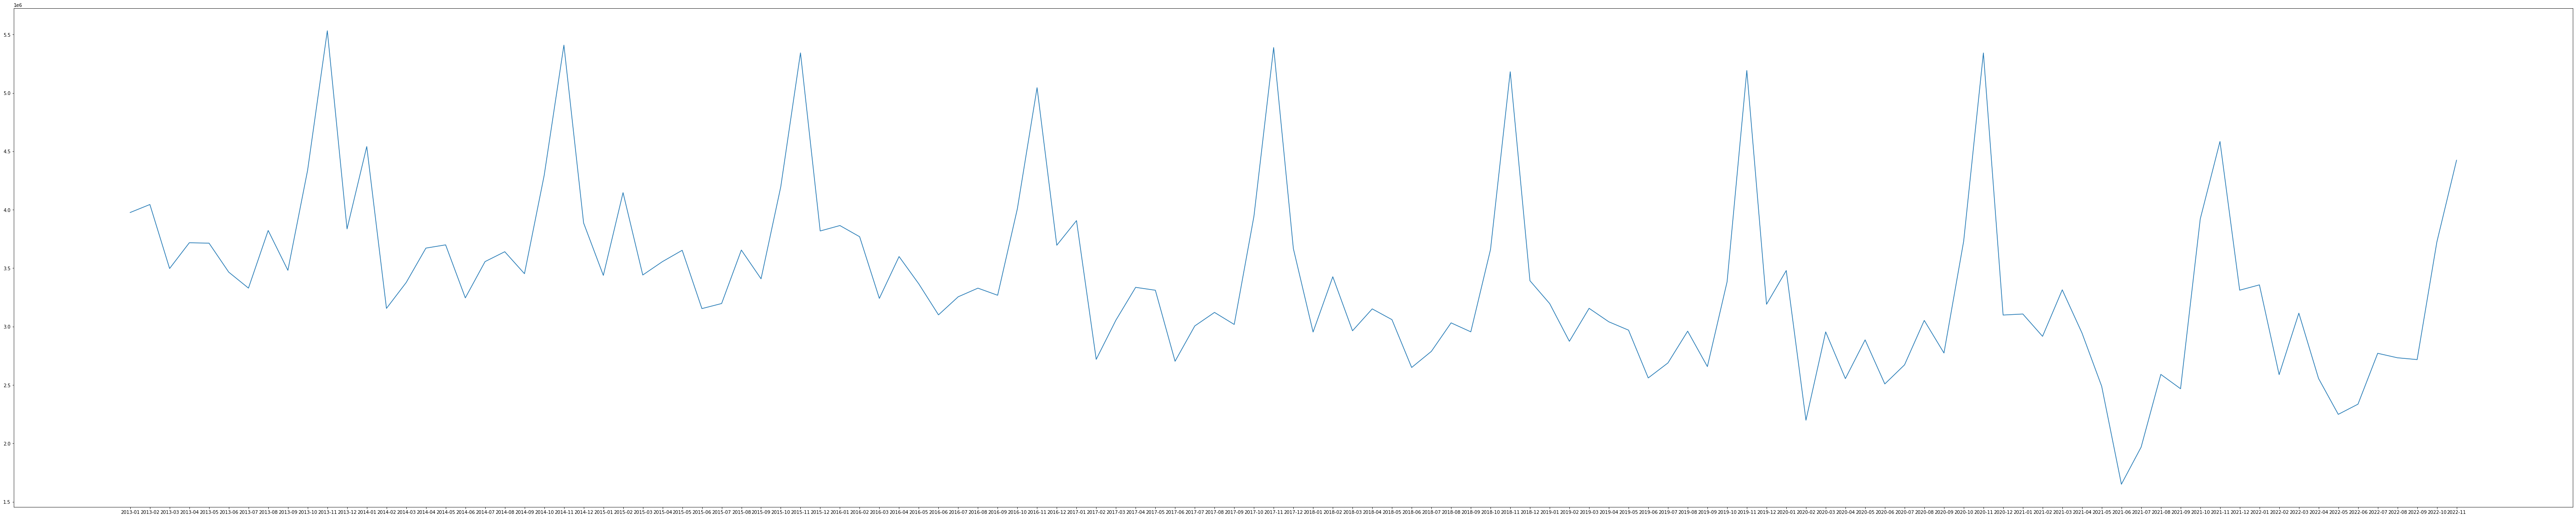

In [22]:
#1. 請用折線圖畫出2013年1月至最新2022年11月之月營收報表。
import csv
# 開啟 CSV 檔案
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
with open('TWSE_2903_Finance.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)
  Sales = list(rows)
  Sales.reverse
  time=[0]*120
  num=[0]*120
  for i in range(1,120):
    time[i]=str(Sales[i][0])
    time[i]+='-'
    if int(Sales[i][1])<10:
      time[i]+='0'
    time[i]+=str(Sales[i][1])
  for j in range(1,120):
    num[j]=int(Sales[j][2])
  
  time.pop(0)
  num.pop(0)
  years = time[:]
  pops = num[:]
  plt.figure(figsize=(100, 20))
  plt.plot(years, pops)
  plt.gca().invert_xaxis()
  plt.show()

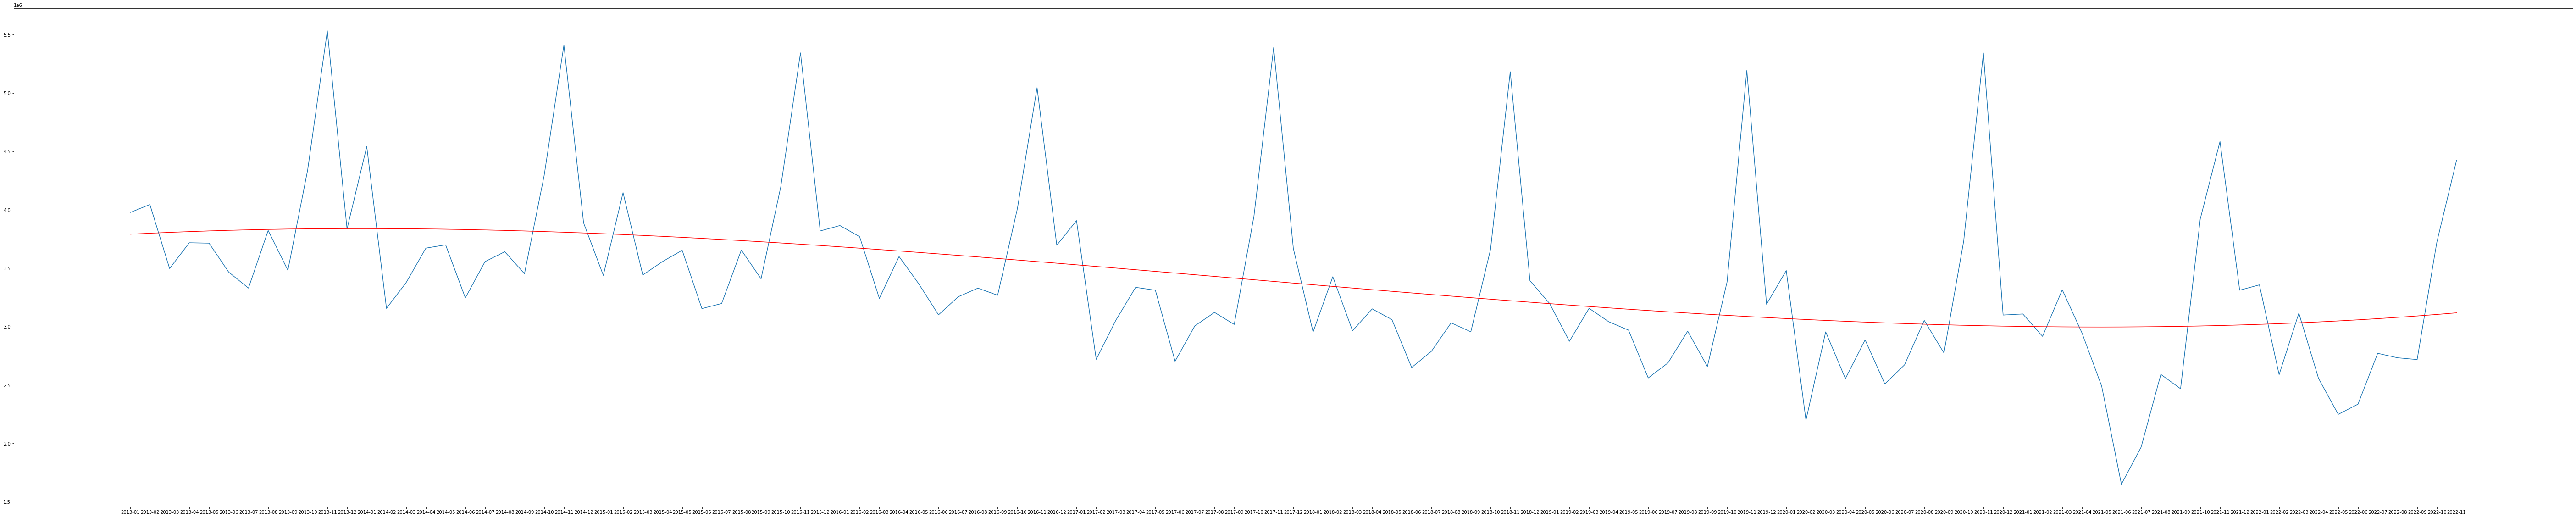

In [23]:
#2. 請就給定的資料，建構合理的迴歸模型，把原始資料走勢與迴歸模型走勢一併畫出並比較。
import csv
# 開啟 CSV 檔案
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
with open('TWSE_2903_Finance.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)
  Sales = list(rows)
  Sales.reverse
  time=[0]*120
  num=[0]*120
  for i in range(1,120):
    time[i]=str(Sales[i][0])
    time[i]+='-'
    if int(Sales[i][1])<10:
      time[i]+='0'
    time[i]+=str(Sales[i][1])
  for j in range(1,120):
    num[j]=int(Sales[j][2])
  
  time.pop(0)
  num.pop(0)
  years = time[:]
  pops = num[:]
  X = range(0,119)
  learning_hours = X
  salary = num[:]
  
data_dict = {'Hours': learning_hours, 'Salary': salary}
df = pd.DataFrame(data_dict)
X = df[['Hours']]
y = df[['Salary']]
regressor = make_pipeline(PolynomialFeatures(3), LinearRegression()) #三次多項式
regressor.fit(X,y)
plt.figure(figsize=(100, 20))
plt.plot(years, pops)
plt.plot(time, regressor.predict(X), color = 'red')
plt.gca().invert_xaxis()
plt.show()

3. 請就你的觀察疫情以來，分析公司的營收是否受影響，又是否能從迴歸模型觀察出來?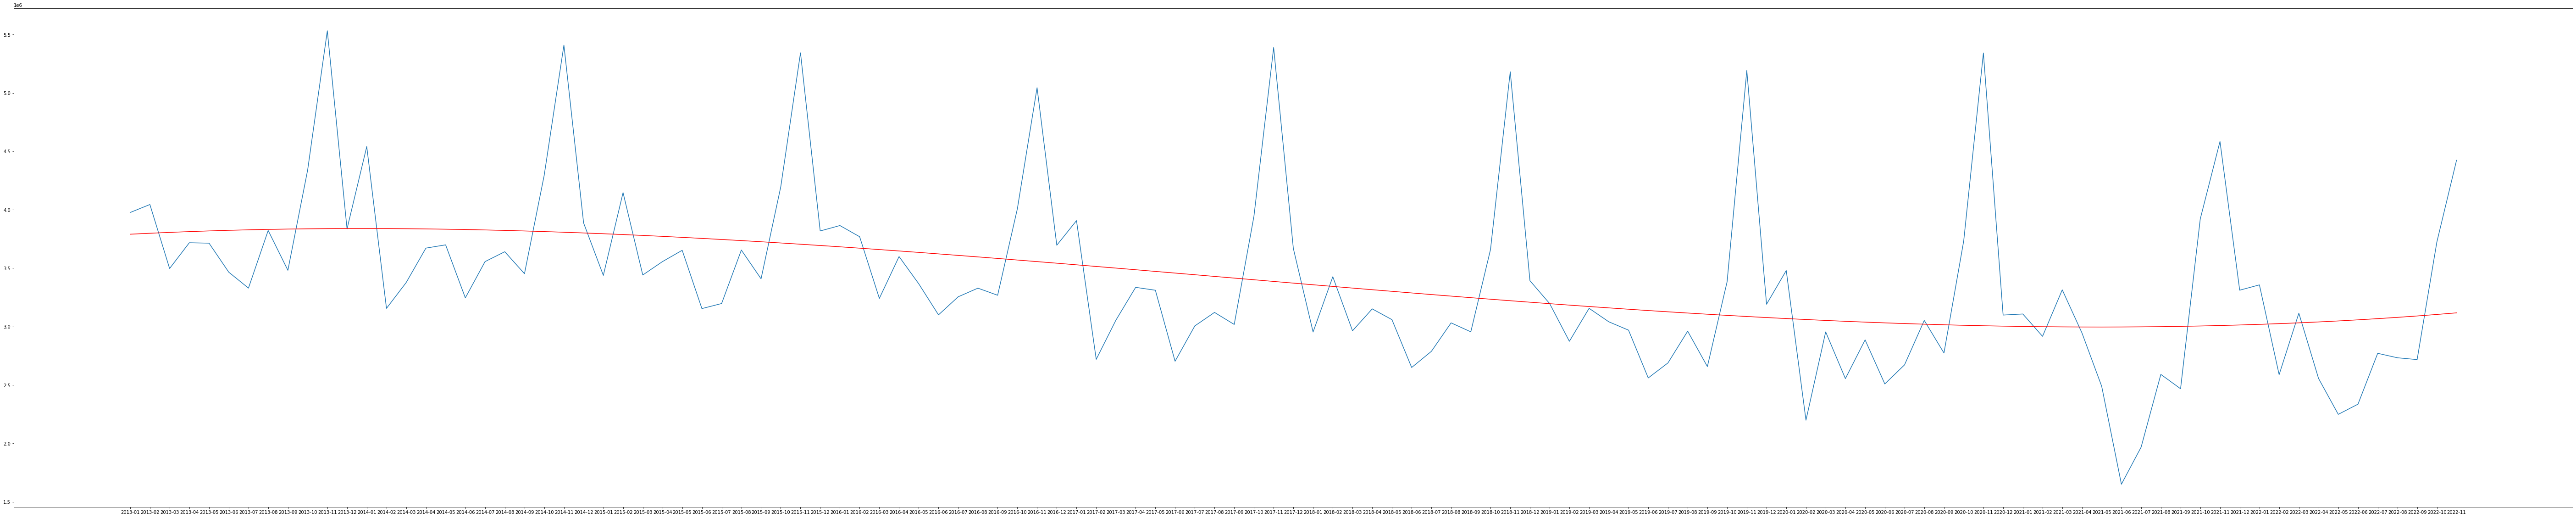

在疫情之前就有慢慢下滑的趨勢，不過最近有趨緩並復甦上升的趨勢，從迴歸曲線的趨勢來看疫情有影響，疫情之後大約2021-06的時候跑到了谷底，整體依然是微微下降，但是對近期有上升的趨勢。

4. 請就你的觀察疫情以來，分析公司營運模型是否發生變化，又能否從迴歸模型觀察出來?
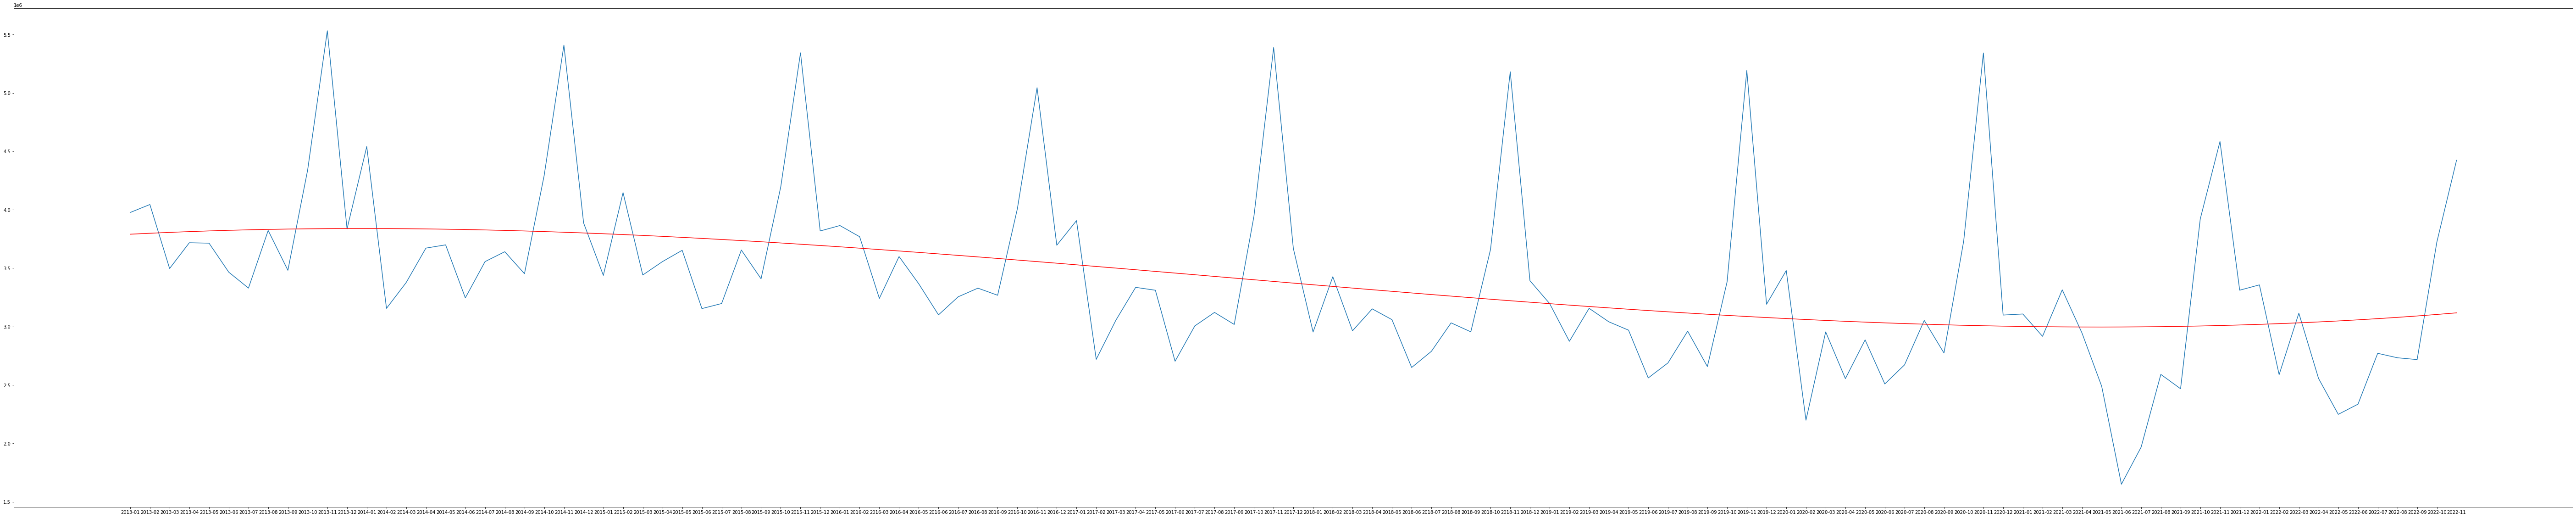

公司營運模式應該是有發生變化，因為在2021年時有著劇烈波動首先是跌到谷底，隨然後面跟著一個山峰，雖然山峰沒有以往那麼的高，但是它比之前還要持續的久(寬)，這證明了那一段時間公司應該有做一些長期促銷活動來去增加買氣延續的時間，並且今年也有慢慢往上爬的趨勢。

---


D: 資源分配問題：「有個木匠每天工作 8 小時，做桌子或椅子。一張桌子要花他 0.9 小時，3 單位木料；一張椅子要花他 1.1 小時，2單位木料。
每天最多可以使用 18 單位木料，而生產一張桌子和一張椅子各可賺毛利 120 和 60 元。
請問該如何分配時間和木料，以最大化每日總毛利？」
針對此問題，請建構了線性規劃模型，並求出 x1  是每日桌子生產量、x2是每日椅子生產量。

x1\*0.9 + x2\*1.1 <= 8

x1\*3 + x2\*2 <=18

x1>=0

x2>=0

max(    x1\*120 + x2\* 60 )


In [24]:
from scipy import optimize as op
import numpy as np
c=np.array([120,60])
A_ub=np.array([[0.9,1.1],[3,2]])
B_ub=np.array([8,18])
x1=(0,None)
x2=(0,None)
res=op.linprog(-c,A_ub,B_ub,bounds=(x1,x2),method = "interior-point")
print(res)
print("================================================================")
print("X1={} ;X2={}".format(res.x[0],res.x[1]))
print("但桌椅只能是整數，所以X1={} ;X2={}".format(np.round(res.x[0], 0),np.round(res.x[1], 0)))
print("最大化每日總毛利={}*120+{}*60={}".format(np.round(res.x[0], 0),np.round(res.x[1], 0),np.round(res.x[0], 0)*120+np.round(res.x[1], 0)*0))

     con: array([], dtype=float64)
     fun: -719.999989371897
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([2.60000007e+00, 2.61640317e-07])
  status: 0
 success: True
       x: array([5.99999991e+00, 8.12451180e-09])
X1=5.999999907370219 ;X2=8.124511795422824e-09
但桌椅只能是整數，所以X1=6.0 ;X2=0.0
最大化每日總毛利=6.0*120+0.0*60=720.0
